<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/matplotlib_collection_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 9.5MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=748fcdfa856851df39c514882d6a6d477a035d4d66117c784373175d91f766aa
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


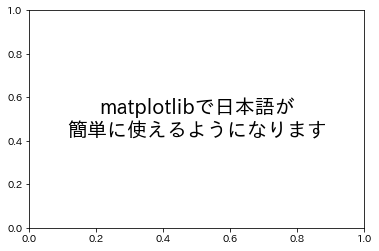

In [3]:
import matplotlib.pyplot as plt
# matplotlibで日本語を使えるようにするライブラリ．たった1行importするだけでとても簡単
import japanize_matplotlib

plt.text(0.5, 0.5, 'matplotlibで日本語が\n簡単に使えるようになります',fontsize=20,horizontalalignment='center', verticalalignment='center')
plt.show()

<IPython.core.display.Javascript object>


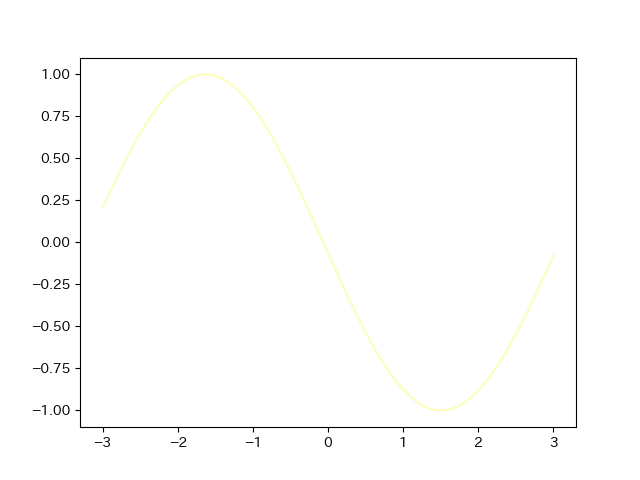

0

In [ ]:
# 3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib.colors import ListedColormap

# アニメーション用のデータを作る
n_epoch = 50
n_sample = 150
X = np.zeros((n_epoch, n_sample, 2))
theta = np.linspace(0, 2*np.pi, n_epoch)
for epoch in range(n_epoch):
    X[epoch, :, 0] = np.linspace(-3, 3, n_sample)
    X[epoch, :, 1] = np.sin(X[epoch, :, 0] + theta[epoch])

# 描画
fig = plt.figure()
ax = fig.add_subplot(111)

# colorのシーケンスを用意する
colors = ListedColormap(sns.color_palette("Spectral", n_epoch)) 

def update(epoch):
    ax.cla()
    ax.plot(X[epoch, :, 0], X[epoch, :, 1], color=colors(epoch))

# 学習過程のアニメーションについての宣言
ani = anim.FuncAnimation(fig, update, interval=200, frames=n_epoch, repeat=True)
gif_name = "your_favarite_gif_name.gif"
# 学習した結果をgifで保存
ani.save(gif_name, writer='imagemagick')

# pythonから直接ターミナルのコマンドを叩くことができるので，
# これを使い，既に保存されたgifに対してimagemagickで圧縮を行う
import subprocess
cmd = "convert " + gif_name + " -layers Optimize " + gif_name
subprocess.call(cmd.split())

<IPython.core.display.Javascript object>


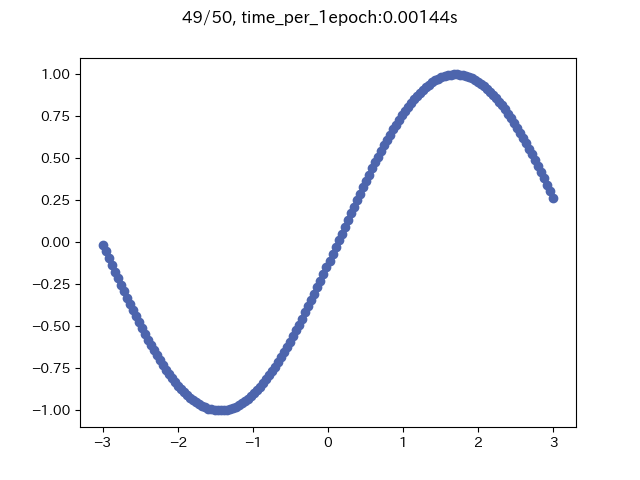

In [ ]:
# 描画を高速化する(単純にfor文が遅い)
%matplotlib nbagg
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as anim
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# アニメーション用のデータを作る
n_epoch = 50
n_sample = 150
X = np.zeros((n_epoch, n_sample, 2))
theta = np.linspace(0, 2*np.pi, n_epoch)
for epoch in range(n_epoch):
    X[epoch, :, 0] = np.linspace(-3, 3, n_sample)
    X[epoch, :, 1] = np.sin(X[epoch, :, 0] + theta[epoch])
    
fig = plt.figure()
ax = fig.add_subplot(111)

colors = ListedColormap(sns.color_palette("Spectral", n_epoch)) 

def update(epoch):
    ax.cla()
    t = time.time()
    ax.scatter(X[epoch, :, 0], X[epoch, :, 1], color=colors(epoch))
#     for i in range(n_sample):
#         ax.scatter(X[epoch, i, 0], X[epoch, i, 1], color=colors(epoch))
    fig.suptitle(f'{epoch+1}/{n_epoch}, time_per_1epoch:{time.time() - t:.5f}s')


# 学習過程のアニメーションの表示
ani = anim.FuncAnimation(fig, update, interval=200, frames=n_epoch, repeat=True)
plt.show()

<IPython.core.display.Javascript object>


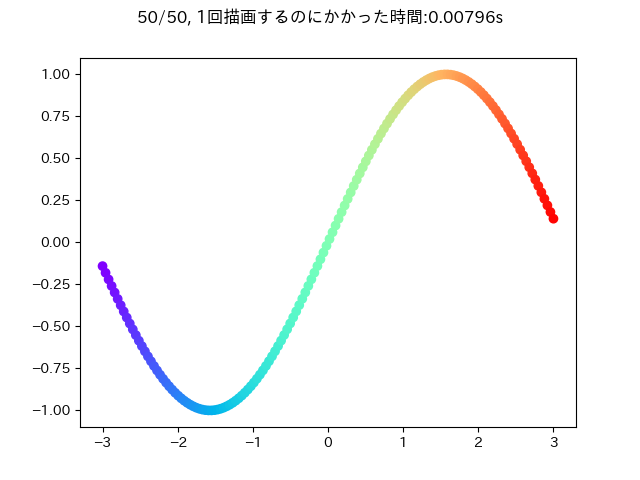

In [ ]:
# scatterの各点ごとに色が異なるときの描画をfor文を使わずに高速化
%matplotlib nbagg
import time
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import japanize_matplotlib

# アニメーション用のデータを作る
n_epoch = 50
n_sample = 150
X = np.zeros((n_epoch, n_sample, 2))
theta = np.linspace(0, 2*np.pi, n_epoch)
for epoch in range(n_epoch):
    X[epoch, :, 0] = np.linspace(-3, 3, n_sample)
    X[epoch, :, 1] = np.sin(X[epoch, :, 0] + theta[epoch])
    
fig = plt.figure()
ax = fig.add_subplot(111)

def update(epoch):
    ax.cla()
    t = time.time()

    # サインカーブに色付けをして描画する部分（for文）
    # for文を使って描画をするのがシンプルだが，描画速度は遅い
    #     for i in range(n_sample):
    #         ax.scatter(X[epoch, i, 0], X[epoch, i, 1], color=cm.rainbow(i / n_sample))

    # 各点に割り当てる色だけを先に用意しておけば，scatterを一度実行するだけでよいのでfor文より描画速度が速い
    colors = [cm.rainbow(i/n_sample) for i in range(n_sample)] # 色のリスト
    ax.scatter(X[epoch, :, 0], X[epoch, :, 1], color=colors)

    fig.suptitle(f'{epoch+1}/{n_epoch}, 1回描画するのにかかった時間:{time.time() - t:.5f}s')

# 学習過程のアニメーションの表示
ani = anim.FuncAnimation(fig, update, interval=200, frames=n_epoch, repeat=True)
plt.show()

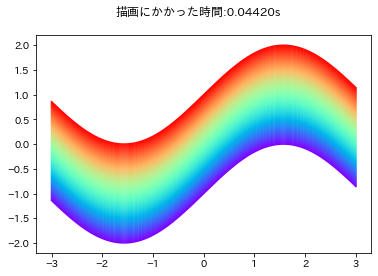

In [ ]:
# plotも高速化（アニメーションの例が思いつかなかったので，ここは静止画です）
%matplotlib inline
import time
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import matplotlib.collections as mc

n_sin = 100
n_sample = 150
X = np.zeros((n_sin, n_sample, 2))
y_shift = np.linspace(-1, 1, n_sin)
for i in range(n_sin):
    X[i, :, 0] = np.linspace(-3, 3, n_sample)
    X[i, :, 1] = np.sin(X[i, :, 0]) + y_shift[i]
    
fig = plt.figure()
ax = fig.add_subplot(111)

# 描画
colors = [cm.rainbow(i/n_sin) for i in range(n_sin)] # 色のリスト
t = time.time()

# for文で描画
for i in range(n_sin):
    ax.plot(X[i, :, 0], X[i, :, 1], color=colors[i])

# LineCollectionによる描画
# lines = np.array([X[i] for i in range(n_sin)])
# lc = mc.LineCollection(lines, colors=colors)
# ax.add_collection(lc)

fig.suptitle(f'描画にかかった時間:{time.time() - t:.5f}s')
# autoscaleをつけないと描画が拡大したような感じになるのでLineCollectionを使うときは必須です
ax.autoscale()

plt.show()

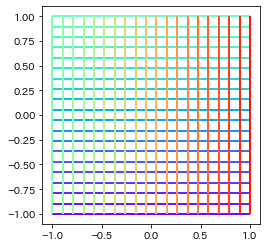

In [ ]:
# 2次元版のplot_wireframeを作る
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.collections as mc

# wireframeで表示したデータの作成
# resolutionはmeshの細かさを表しています
resolution = 20
x = y = np.linspace(-1, 1, resolution)
grid_x, grid_y = np.meshgrid(x, y)
segs1 = np.stack((grid_x, grid_y), axis=2)
segs2 = segs1.transpose(1, 0, 2)   # segs1に対して交差するようにplotしたいので転置する
segs = np.r_[segs1,segs2]

# 描画
colors = [cm.rainbow(i/len(segs)) for i in range(len(segs))] # 色のリスト

fig = plt.figure()
ax = fig.add_subplot(111, aspect=True)
ax.add_collection(mc.LineCollection(segs, linewidth=2, colors=colors))
ax.autoscale()
plt.show()

<IPython.core.display.Javascript object>


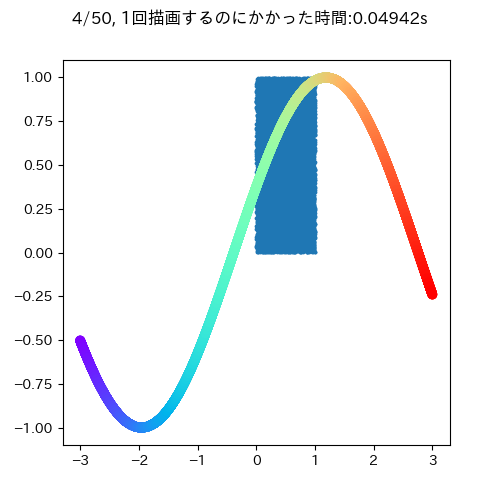

In [ ]:
# 差分更新による描画の高速化（差分更新なしのとき）
%matplotlib nbagg
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as anim
import japanize_matplotlib

n_epoch = 50
n_sample = 10000

# 時間によって結果が変わるデータを作成
X1 = np.zeros((n_epoch, n_sample, 2))
theta = np.linspace(0, 2*np.pi, n_epoch)
for epoch in range(n_epoch):
    X1[epoch, :, 0] = np.linspace(-3, 3, n_sample)
    X1[epoch, :, 1] = np.sin(X1[epoch, :, 0] + theta[epoch])

# 時間によって変わらないデータを作成
X2 = np.random.rand(n_sample, 2) 

# 描画
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1,1,1)
colors = [cm.rainbow(i/n_sample) for i in range(n_sample)] # 色のリスト

def update(epoch):
    ax.cla()
    t = time.time()
    ax.scatter(X1[epoch, :, 0], X1[epoch, :, 1], color=colors)
    ax.scatter(X2[:,0], X2[:,1], s=3, zorder=0)
    fig.suptitle(f'{epoch+1}/{n_epoch}, 1回描画するのにかかった時間:{time.time() - t:.5f}s')

# 学習過程のアニメーションの表示
ani = anim.FuncAnimation(fig, update, interval=200, frames=n_epoch, repeat=True)
plt.show()

<IPython.core.display.Javascript object>


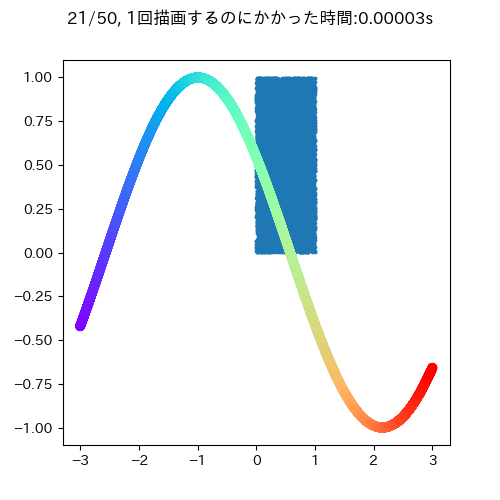

In [ ]:
# 差分更新による描画の高速化（差分更新ありのとき）
%matplotlib nbagg
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as anim
import japanize_matplotlib

n_epoch = 50
n_sample = 10000

# 時間によって結果が変わるデータを作成
X1 = np.zeros((n_epoch, n_sample, 2))
theta = np.linspace(0, 2*np.pi, n_epoch)
for epoch in range(n_epoch):
    X1[epoch, :, 0] = np.linspace(-3, 3, n_sample)
    X1[epoch, :, 1] = np.sin(X1[epoch, :, 0] + theta[epoch])

# 時間によって変わらないデータを作成
X2 = np.random.rand(n_sample, 2) 

# 描画
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1,1,1)
colors = [cm.rainbow(i/n_sample) for i in range(n_sample)] # 色のリスト

scat_X1 = ax.scatter(X1[0, :, 0], X1[0, :, 1], color=colors)
print(scat_X1)
ax.scatter(X2[:, 0], X2[:, 1], s=3, zorder=0)

def update(epoch):
    t = time.time()
    # 更新したいデータ点のみ変更する
    scat_X1.set_offsets(X1[epoch])
    fig.suptitle(f'{epoch+1}/{n_epoch}, 1回描画するのにかかった時間:{time.time() - t:.5f}s')

# 学習過程のアニメーションの表示
ani = anim.FuncAnimation(fig, update, interval=200, frames=n_epoch, repeat=True)
plt.show()

<IPython.core.display.Javascript object>


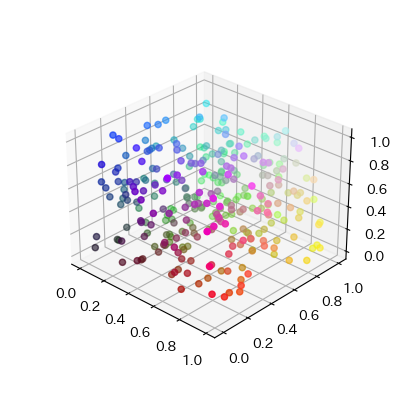

In [ ]:
# 3次元の座標（予め各次元ごとに0〜1に収まるように正規化）をそのままRGB値として使う方法（記事内では紹介していません）
%matplotlib nbagg
RGB = np.random.rand(300,3) 
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1, projection = '3d')
ax.scatter(RGB[:,0], RGB[:,1], RGB[:,2], facecolors=RGB)
plt.show()

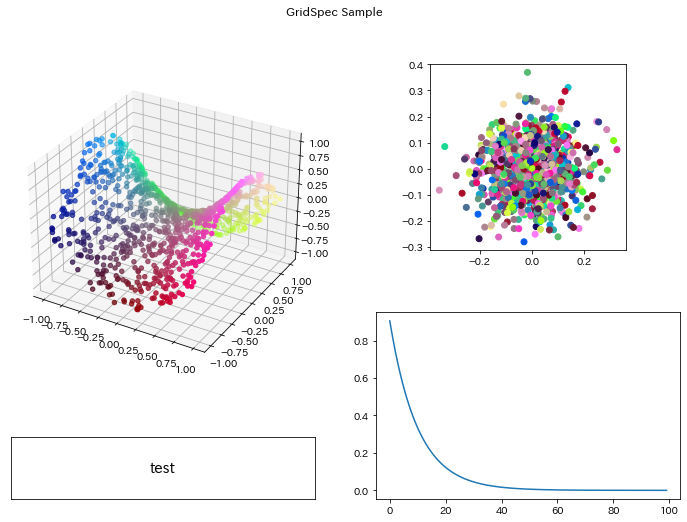

In [ ]:
# gridspecを使うと，簡単にサイズの異なるsubplotを作ることができる
# https://qiita.com/simonritchie/items/da54ff0879ad8155f441
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from sklearn import preprocessing

# プロットで描画するデータを準備
# 3d用
n_sample = 1000
X = np.zeros(shape=(n_sample, 3))
data = np.random.rand(n_sample, 2) * 2 - 1
mesh = data[:, 0] ** 2 - data[:, 1] ** 2
X[:, 0] = data[:, 0]
X[:, 1] = data[:, 1]
X[:, 2] = mesh
# Xの各点に色を割り当てる．sklearnのMinMaxScalerを使って各軸について0~1になるように正規化し，その値をXのRGB値にする
mmscaler = preprocessing.MinMaxScaler()
mmscaler.fit(X)
X_RGB = mmscaler.transform(X)
# 2d用
Z = np.random.normal(loc=0, scale=0.1, size=(n_sample, 2))
# loss用
loss = np.exp(-0.1*np.linspace(1, 100, 100))

# 描画
fig = plt.figure(figsize=(12, 8))
gs_master = GridSpec(nrows=4, ncols=2, hspace=1)
gs_3d = GridSpecFromSubplotSpec(nrows=3, ncols=1, subplot_spec=gs_master[:-1, 0:1])
gs_2d = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[:-2, 1:2])
gs_param = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs_master[-1:, 0:1])
gs_loss = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs_master[-2:, 1:2])
ax_3d = fig.add_subplot(gs_3d[:, :], projection='3d')
ax_2d = fig.add_subplot(gs_2d[:, :], aspect=True)
ax_param = fig.add_subplot(gs_param[:, :])
ax_loss = fig.add_subplot(gs_loss[:, :])

ax_3d.scatter(X[:, 0], X[:, 1], X[:, 2], color=X_RGB)
ax_2d.scatter(Z[:, 0], Z[:, 1], color=X_RGB)
ax_loss.plot(np.arange(len(loss)), loss)
ax_param.text(0.5, 0.5, 'test', fontsize=15,
                          horizontalalignment='center', verticalalignment='center', transform=ax_param.transAxes)
ax_param.xaxis.set_visible(False), ax_param.yaxis.set_visible(False)

plt.suptitle('GridSpec Sample')
plt.show()

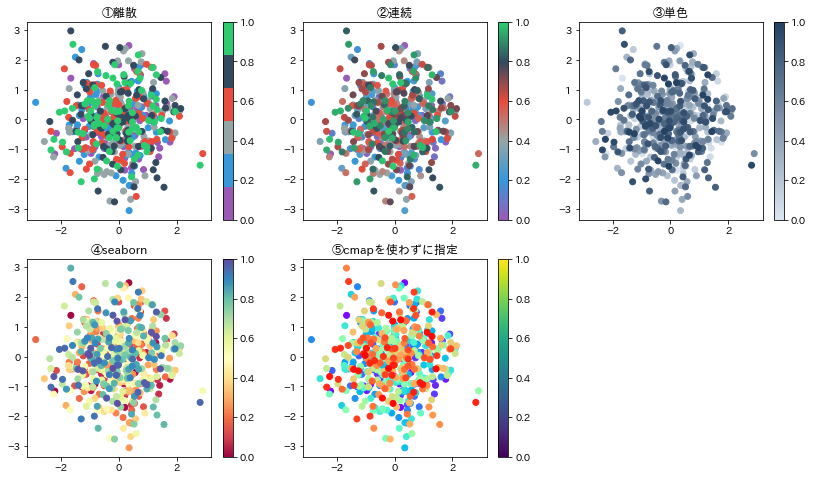

In [ ]:
# 色の値を直接取ってくる方法
# https://stackoverflow.com/questions/37902459/seaborn-color-palette-as-matplotlib-colormap
# https://qiita.com/HidKamiya/items/524d77e3b53a13849f1a
# https://stackoverflow.com/questions/37401872/custom-continuous-color-map-in-matplotlib
# https://haltaro.github.io/2018/10/12/plotly-colorpalette
# https://qiita.com/SaitoTsutomu/items/c79c9973a92e1e2c77a7
# https://qiita.com/tnabe/items/1cb5ca47d27971c7a6b9
# https://qiita.com/HidKamiya/items/524d77e3b53a13849f1a
%matplotlib inline
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import japanize_matplotlib

# color_mapの作り方
color_list = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# 離散的に色が変わるcmapの作り方
cmap1 = ListedColormap(sns.color_palette(color_list, 6))
# 連続的に色が変わるcmapの作り方
cmap2 = LinearSegmentedColormap.from_list(name='continuous', colors=color_list, N=256)
# 単色のcmapの作り方（Nは解像度）
cmap3 = LinearSegmentedColormap.from_list(name='custom blue', colors=[ '#DCE6F1', '#244162'], N=256)
# seabornのcmapを使う方法
cmap4 = ListedColormap(sns.color_palette("Spectral", 256)) 

N = 500
data1 = np.random.randn(N)
data2 = np.random.randn(N)
colors = np.linspace(0,1,N)

fig = plt.figure(figsize=(14, 8))
gs_master = GridSpec(nrows=2, ncols=3, hspace=0.2, wspace=0.2)
gs1 = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs_master[:1, 0:1])
gs2 = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs_master[:1, 1:2])
gs3 = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs_master[:1, 2:3])
gs4 = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs_master[1:, 0:1])
gs5 = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs_master[1:, 1:2])

ax1 = fig.add_subplot(gs1[:, :])
ax2 = fig.add_subplot(gs2[:, :])
ax3 = fig.add_subplot(gs3[:, :])
ax4 = fig.add_subplot(gs4[:, :])
ax5 = fig.add_subplot(gs5[:, :])

scat_ax1 = ax1.scatter(data1, data2, c=colors, cmap=cmap1)
fig.colorbar(scat_ax1, ax=ax1)

scat_ax2 = ax2.scatter(data1, data2, c=colors, cmap=cmap2)
fig.colorbar(scat_ax2, ax=ax2)

scat_ax3 = ax3.scatter(data1, data2, c=colors, cmap=cmap3)
fig.colorbar(scat_ax3, ax=ax3)

scat_ax4 =　ax4.scatter(data1, data2, c=colors, cmap=cmap4)
fig.colorbar(scat_ax4, ax=ax4)

# cmapを指定せすにcolorでデータの着色もできるがcolor barはデフォルトの設定のままなようです（colorbarとの不一致をどう解消すればいいのかは不明です）
colors = [cm.rainbow(i/N) for i in range(N)] # 色のリスト
scat_ax5 = ax5.scatter(data1, data2, color=colors)
fig.colorbar(scat_ax5, ax=ax5)

ax1.set_title('①離散')
ax2.set_title('②連続')
ax3.set_title('③単色')
ax4.set_title('④seaborn')
ax5.set_title('⑤cmapを使わずに指定')

plt.savefig('test.jpg')
plt.show()

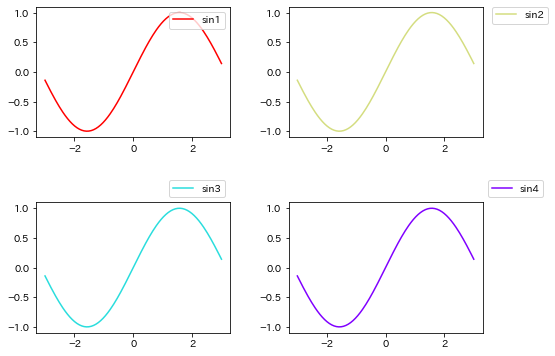

In [ ]:
# legendの位置調整
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

# データの作成
n_epoch = 50
n_sample = 150
X = np.zeros((n_sample, 2))
X[:, 0] = np.linspace(-3, 3, n_sample)
X[:, 1] = np.sin(X[:, 0])

fig = plt.figure(figsize=(8, 6))
gs_master = GridSpec(nrows=2, ncols=2, hspace=0.5, wspace=0.3)
gs1 = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs_master[:1, 0:1])
gs2 = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs_master[:1, 1:2])
gs3 = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs_master[1:, 0:1])
gs4 = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs_master[1:, 1:2])


ax1 = fig.add_subplot(gs1[:, :])
ax2 = fig.add_subplot(gs2[:, :])
ax3 = fig.add_subplot(gs3[:, :])
ax4 = fig.add_subplot(gs4[:, :])

c_linspace = np.linspace(1, 0, 4, endpoint=True)

ax1.plot(X[:, 0], X[:, 1], color=cm.rainbow(c_linspace[0]), label='sin1')
ax2.plot(X[:, 0], X[:, 1], color=cm.rainbow(c_linspace[1]), label='sin2')
ax3.plot(X[:, 0], X[:, 1], color=cm.rainbow(c_linspace[2]), label='sin3')
ax4.plot(X[:, 0], X[:, 1], color=cm.rainbow(c_linspace[3]), label='sin4')

ax1.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0.5)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax3.legend(bbox_to_anchor=(1, 1), loc='lower right', borderaxespad=0.5)
ax4.legend(bbox_to_anchor=(1, 1), loc='lower left', borderaxespad=0.5)

plt.show()

<IPython.core.display.Javascript object>


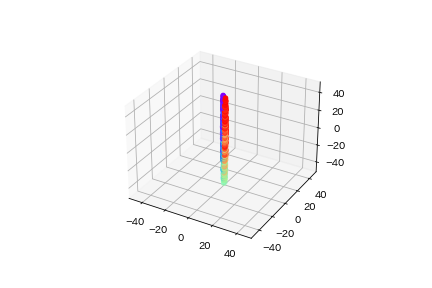

In [ ]:
# ３次元の描画のときのset_aspect('equal')のやり方
%matplotlib nbagg

# 使用するデータ
# Z軸だけわざとスケールを５０倍にしています．
n_sample = 1000
data = np.random.rand(n_sample, 2) * 2 - 1
X = data[:, 0]
Y = data[:, 1]
Z = (data[:, 0] ** 2 - data[:, 1] ** 2) * 50

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X, Y, Z, c=X, cmap='rainbow')

# ３次元のaspect('equal')をしたいときは下記の内容をコメントアウトする
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() * 0.5
mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()